# Mounting Google Drive and setting Kaggle API key path


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

Mounted at /content/drive


## Downloading dataset from Kaggle


# 📦 1. Dataset Download — Country Data for Unsupervised Learning
🔹 What it is:
This command downloads a public dataset from Kaggle named "Unsupervised Learning on Country Data" created by user rohan0301. The dataset contains various socio-economic and demographic indicators for different countries.

🔹 How it works:
The ! at the beginning runs the command in a shell (used in Jupyter notebooks or Google Colab). The kaggle datasets download command requires the Kaggle API to be installed and authenticated. The string rohan0301/unsupervised-learning-on-country-data is the unique path to the dataset on Kaggle.

🔹 Why it's used:
We use this dataset to perform unsupervised learning, particularly clustering techniques (such as K-Means) to group countries based on similarities in their economic and social metrics. This helps discover hidden patterns or segments among nations without using predefined labels.



In [ ]:
! kaggle datasets download rohan0301/unsupervised-learning-on-country-data

Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
License(s): MIT
  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 24.1MB/s]


# Unzipping downloaded dataset


In [ ]:
! unzip /content/unsupervised-learning-on-country-data.zip

Archive:  /content/unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


#📚 2. Importing Required Libraries

🔹 What it is:
This block imports essential Python libraries that will be used for data analysis, visualization, and numerical operations throughout the project.

> NumPy: A fundamental package for numerical computations. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them.

> Pandas: A powerful library for data manipulation and analysis. It allows us to load, explore, clean, and transform data in tabular (DataFrame) form.

> Pandas: A powerful library for data manipulation and analysis. It allows us to load, explore, clean, and transform data in tabular (DataFrame) form.

> Seaborn: A statistical data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics (e.g., heatmaps, boxplots).

> Plotly Express: A high-level wrapper for Plotly, which allows for interactive plotting. Great for exploring data dynamically with features like zooming, hovering, and filtering.


🔹 Why it's used:
These libraries provide a robust toolkit for:

Data loading and processing (pandas, numpy)

Statistical and exploratory analysis (seaborn, matplotlib)

Creating both static and interactive visualizations (matplotlib, seaborn, plotly.express)
They enable us to explore patterns, understand relationships, and communicate insights effectively in our unsupervised learning project.






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Initialization


📄 3. Loading and Displaying the Data Dictionary
🔹 What it is:
This step involves loading a data dictionary file that provides descriptive information about the columns in the main dataset. The data dictionary acts as a reference for understanding what each feature represents.

🔹 How it works:
The file data-dictionary.csv is read using pandas.read_csv(), and its contents are stored in a DataFrame called df_dictionaty. Although read_csv() already returns a DataFrame, wrapping it again in pd.DataFrame() ensures clarity and consistency. Displaying the DataFrame helps us examine the definitions of each feature in the dataset.

🔹 Why it's used:
Understanding the meaning of each feature is crucial in unsupervised learning tasks, where we don’t have target labels. The data dictionary provides valuable context that informs our decisions during preprocessing, clustering, and interpretation of the results.



In [ ]:
data_dictionary = pd.read_csv('/content/data-dictionary.csv')
df_dictionaty = pd.DataFrame(data_dictionary)

df_dictionaty

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...



#🌍 4. Loading and Exploring the Country-Level Dataset

🔹 What it is:
The dataset contains socio-economic and health-related indicators for 167 countries. Each row represents a country, and the columns include metrics such as child mortality rate, life expectancy, GDP per capita, income, inflation, and more. This data serves as the foundation for performing unsupervised learning tasks like clustering.

🔹 Dataset Preview:
Key columns in the dataset include:

country: Name of the country

child_mort: Child mortality (deaths per 1000 live births)

exports: Exports as % of GDP

health: Total health spending as % of GDP

imports: Imports as % of GDP

income: Net income per person

inflation: Annual inflation rate (%)

life_expec: Average life expectancy

total_fer: Fertility rate

gdpp: GDP per capita

🔹 Why it's important:
This dataset is ideal for unsupervised learning because:

It has no target variable (label), making it suitable for clustering and pattern discovery.

It covers diverse economic and health indicators that can reveal similarities or disparities between countries.

Understanding underlying patterns in such data can support policy-making, international aid allocation, and global health/economic studies.

🔹 How it will be used:
The dataset will be:

Cleaned and normalized

Visualized to understand variable distributions and relationships

Used for clustering countries based on multi-dimensional similarities

Interpreted to understand the common traits of country groups (clusters)

In [ ]:
data_contry = pd.read_csv('/content/Country-data.csv')
df_country = pd.DataFrame(data_contry)

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 🛠 5. Setting the Index and Dropping Redundant Column
🔹 What it is:
In this step, we set the country column as the index of the DataFrame. Since the country name uniquely identifies each row, it makes sense to use it as the row index. After setting it as the index, we remove the original country column to avoid redundancy.

🔹 Why it's used:
Using country names as the DataFrame index improves clarity when referencing rows, especially in data visualization and analysis. It also keeps the dataset tidy by removing unnecessary duplication of information.

In [ ]:
df_country.set_index(df_country['country'], inplace=True)
df_country.drop(columns=['country'], inplace=True)

# 📊 6. Generating Descriptive Statistics
🔹 What it is:
This step involves calling .describe() on the dataset to generate summary statistics for each numerical column. It includes metrics such as mean, standard deviation, minimum, maximum, and various percentiles (25%, 50%, 75%).

🔹 Why it's used:
Descriptive statistics allow us to:

Identify anomalies or outliers

Detect the need for normalization or scaling

Understand which features might dominate or skew analysis if left untreated

In [ ]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


# Exploratory Data Analysis



> Multiple plots for feature exploration




#📈 7. Visualizing Pairwise Relationships with Seaborn
🔹 What it is:
In this step, we use sns.pairplot() to visualize pairwise relationships among all numerical features in the dataset. Each subplot shows the scatterplot between two variables, allowing us to detect linear or non-linear associations, outliers, and clustering patterns.

The diagonal plots show the distribution (histogram/kde) of each feature.

Points are color-coded based on the health feature to help visually identify how health spending might relate to other variables.

🔹 Why it's used:
Pairplots help us to:

Quickly assess the strength and direction of relationships between features

Spot possible groupings (clusters) or outliers

Decide which variables may contribute most to meaningful clustering later

🔹 Notable Observations:

child_mort appears to be negatively correlated with both income and life_expec

gdpp is positively correlated with income and life_expec

Some variables (like inflation) appear to have high variance or outliers

This step provides a strong visual intuition before applying any clustering algorithm.

/tmp/ipython-input-10-108526089.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


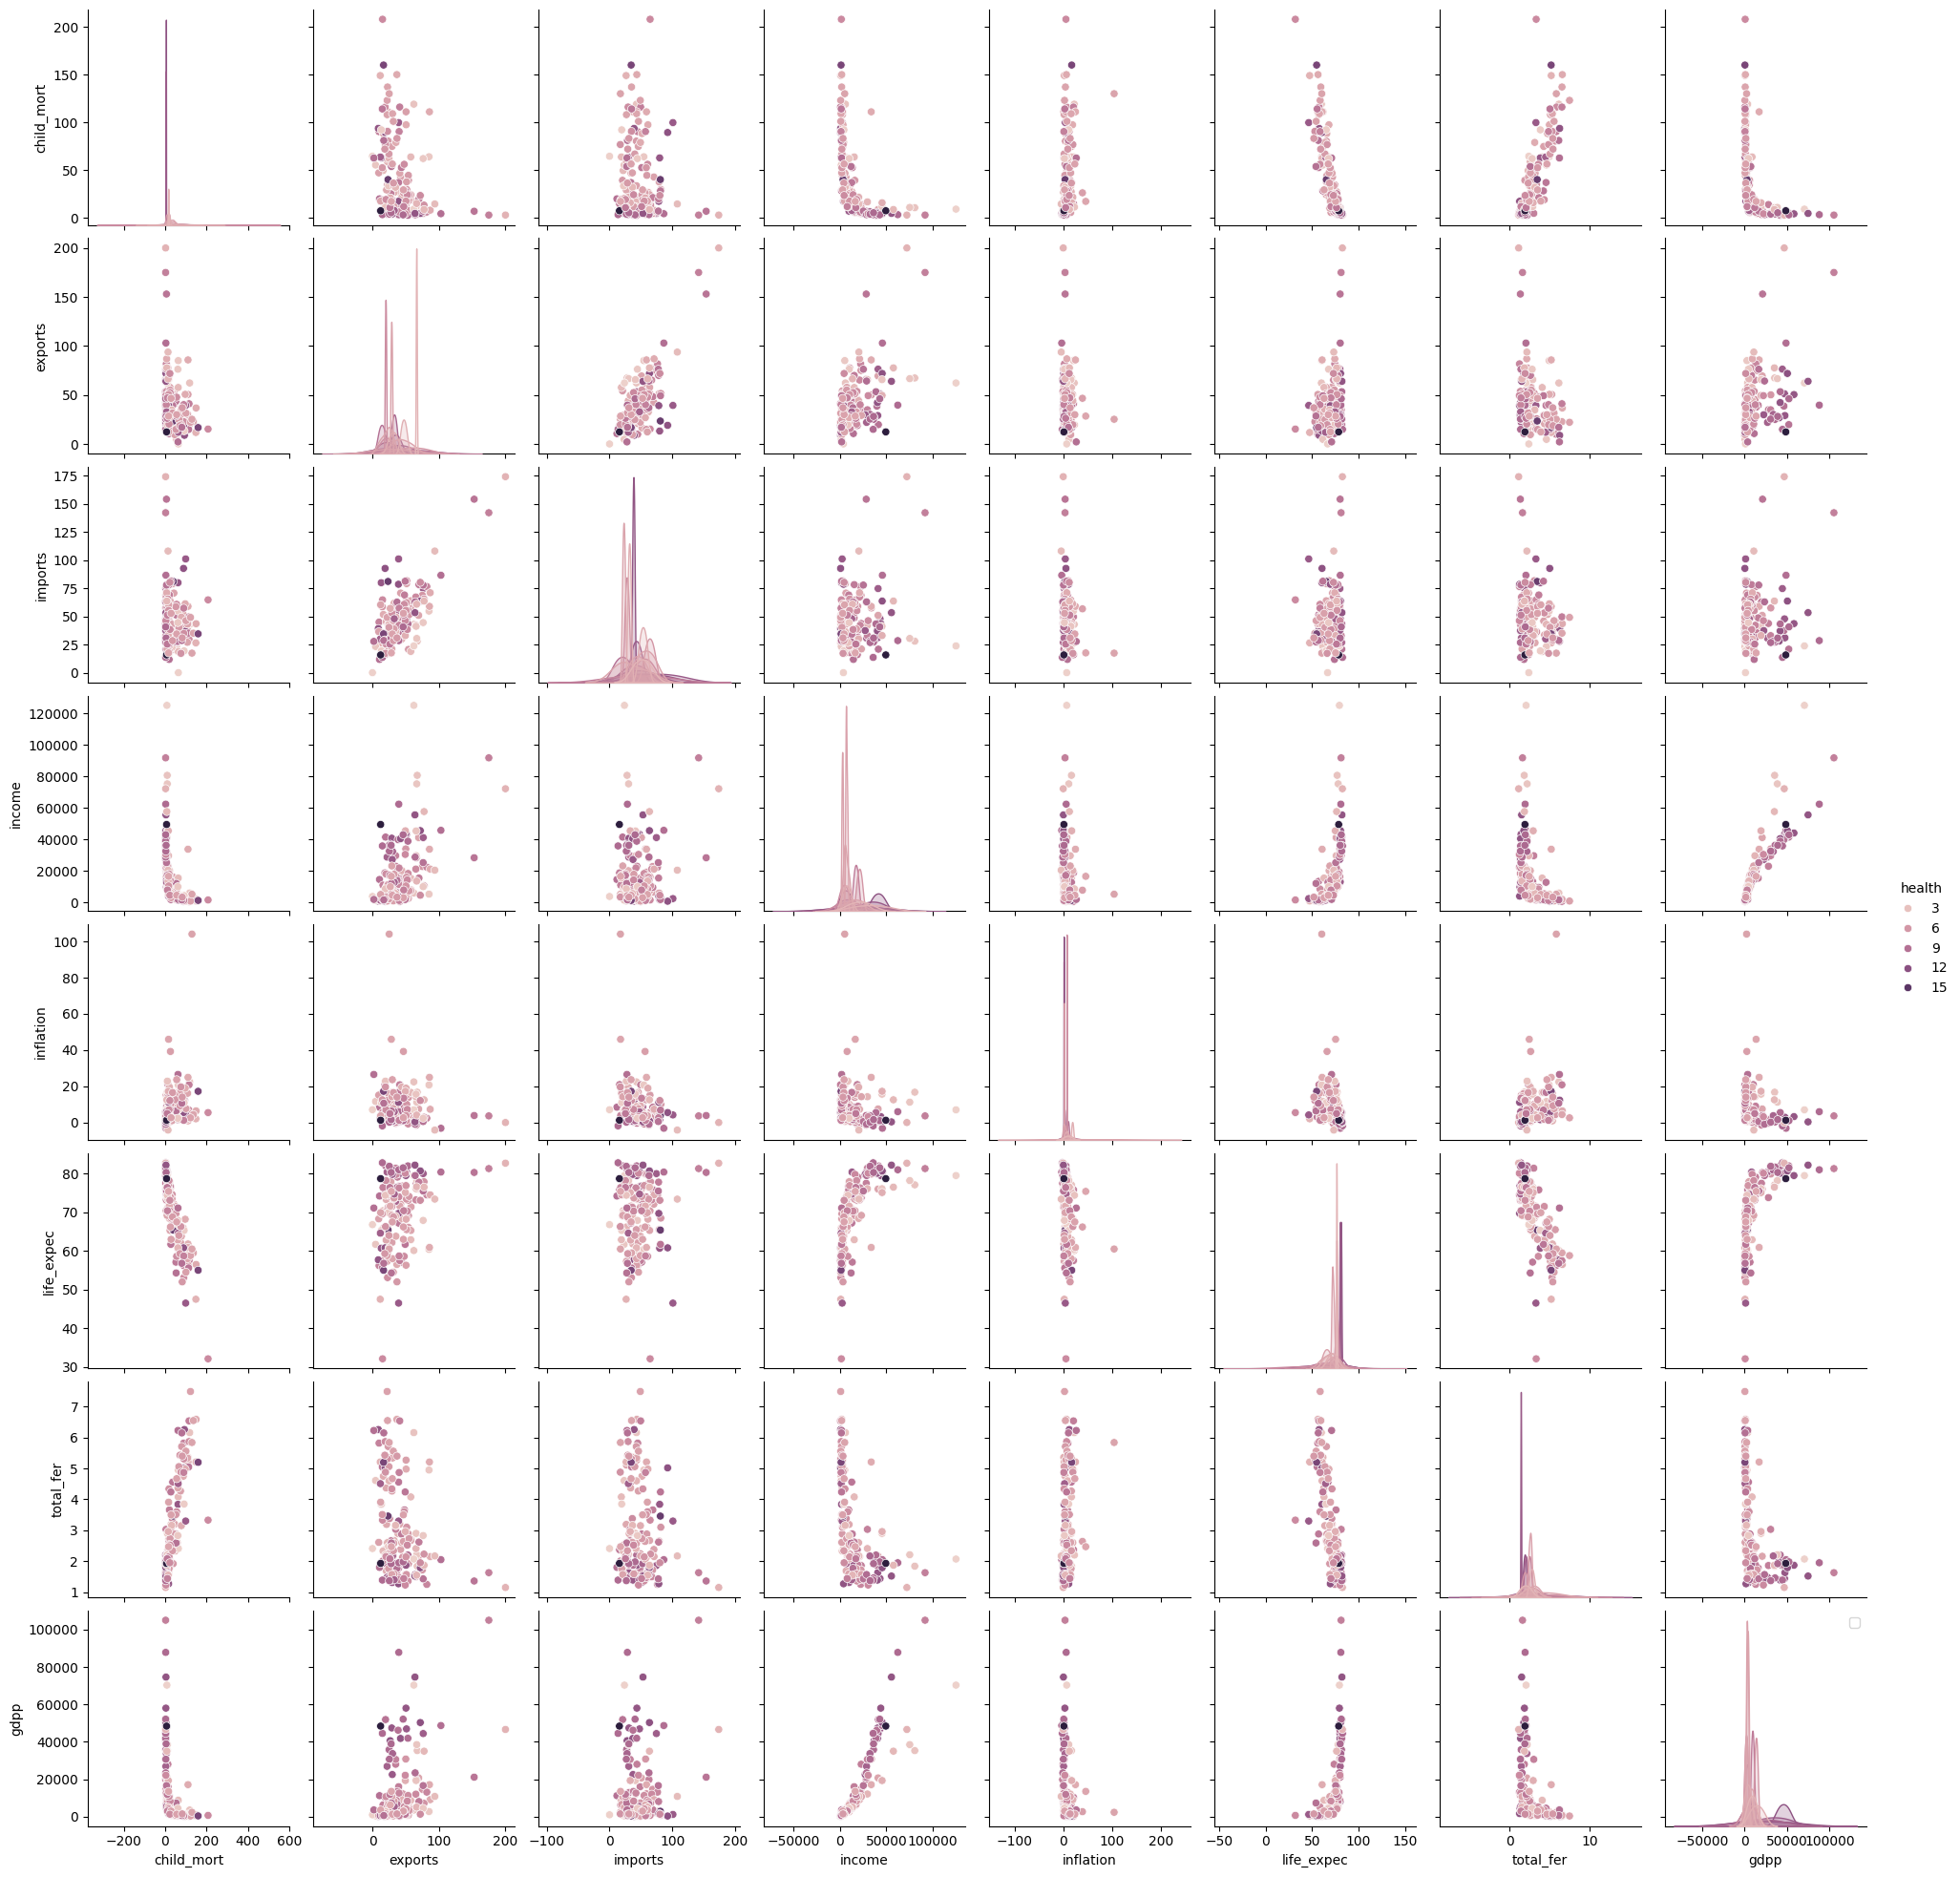

In [ ]:
# plt.scatter(df_contry.iloc[:, 3], df_contry.iloc[:, 0])

sns.pairplot(df_country, hue='health')
plt.legend()
plt.show()

## 📊 Pairplot Analysis – Visual Exploration of Feature Relationships

This pair plot visualizes pairwise relationships between all numerical features in the dataset. The points are colored by the `health` feature, which represents health expenditure as a percentage of GDP.

### Key Observations:

1. **Strong Negative Correlation:**  
   - `child_mort` (child mortality) shows a strong negative correlation with:
     - `income`
     - `gdpp`
     - `life_expec`  
   ⟶ Countries with higher child mortality tend to have lower income, GDP, and life expectancy.

2. **Strong Positive Correlation:**  
   - `income`, `gdpp`, and `life_expec` are positively correlated.  
   ⟶ Higher-income countries generally have longer life expectancy and higher GDP per capita.

3. **High Variance in Inflation:**  
   - `inflation` values are widely spread and include outliers.  
   - Weak or no clear relationships with other features.

4. **Diverse Distribution in `exports`, `imports`, and `health`:**  
   - These features do not show strong pairwise correlations but might contribute to multi-dimensional clustering.

5. **Color Mapping (health):**  
   - Darker points (higher health spending) are mostly concentrated in regions with low child mortality and high income/life expectancy.  
   ⟶ Suggests a link between healthcare investment and overall development.

### Summary:
This plot helps reveal patterns and relationships useful for:
- Feature selection for clustering
- Understanding underlying structure in the data
- Spotting potential outliers or redundant features

---------------------------------------

# 📊 8. Visualizing Distributions of Numeric Features
🔹 What it is:
This step generates histograms with KDE (Kernel Density Estimation) curves for each numeric column in the dataset. It helps us understand how the data is distributed—whether it's skewed, normal, uniform, or contains outliers.

🔹 How it works:

We first identify all numeric columns using select_dtypes().

Then, we dynamically create a grid of subplots using matplotlib.

For each numeric column, a histogram with a KDE line is plotted using sns.histplot().

Any unused axes in the grid are hidden to maintain a clean layout.

Finally, the plot is saved as an image and displayed.

🔹 Why it's used:

Helps detect skewed distributions and the need for transformation (e.g., log scale)

Reveals potential outliers and data spread

Assists in deciding on normalization or scaling strategies



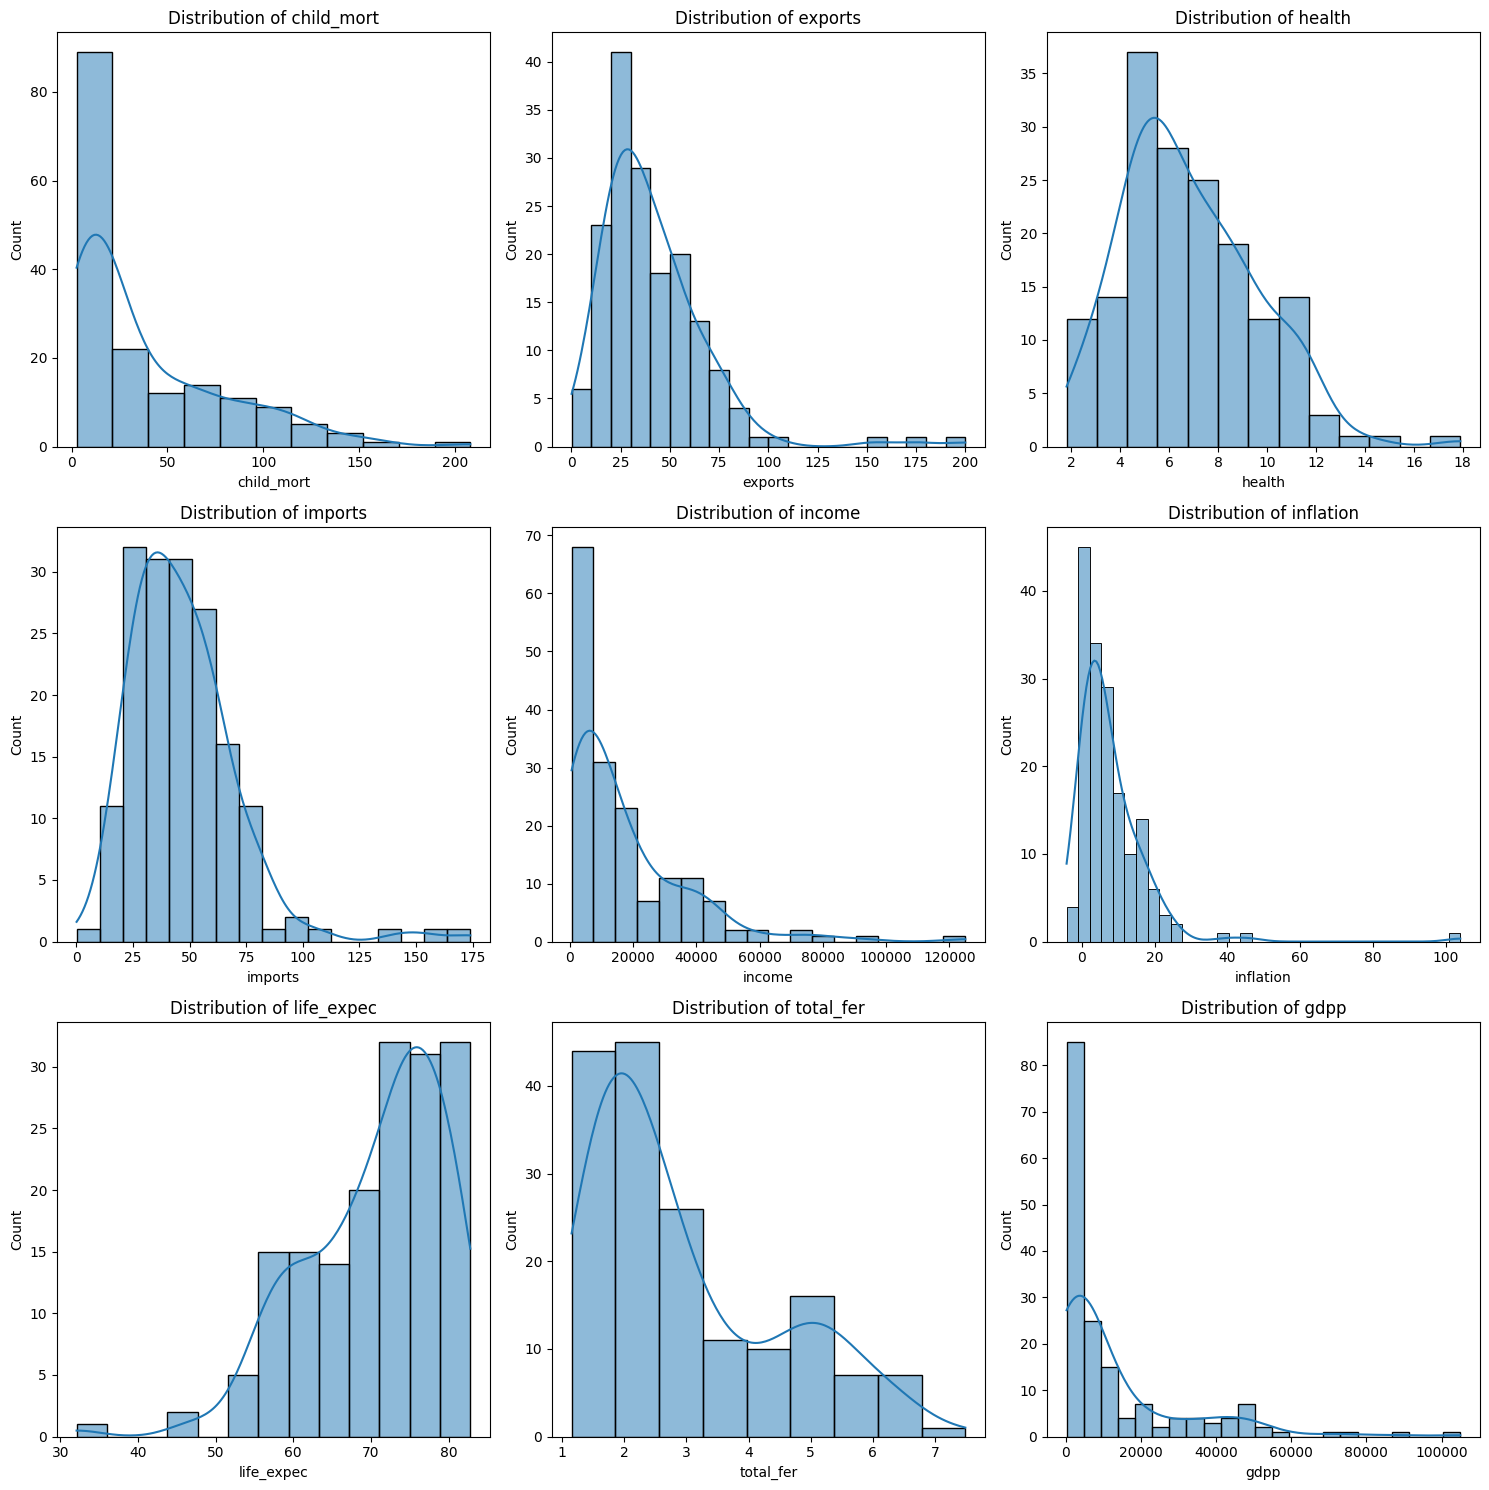

In [ ]:
numeric_columns = df_country.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df_country[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)


plt.tight_layout()
plt.savefig('numeric_columns_distribution.png')
plt.show()

## 📊 Distribution Analysis of Numerical Features

These histograms with KDE lines show the distribution of each numerical feature in the dataset. Key observations from the plots:

### 🔎 Key Insights:

- **Right-skewed distributions (long right tail):**
  - `child_mort`, `income`, `gdpp`, `total_fer`, `inflation`  
  ⟶ These features have most data concentrated at lower values, with a few very high values (outliers).

- **Moderately skewed or near-normal:**
  - `health`, `life_expec`, `exports`, `imports`  
  ⟶ These features are more balanced, though still slightly skewed.

- **Features with outliers:**
  - `income`, `gdpp`, `inflation`  
  ⟶ These variables have extreme values that may require normalization or scaling.

### 💡 Why this matters:
- Helps detect **skewed features** that may distort clustering results.
- Highlights features that may need **log transformation or scaling**.
- Gives an overall sense of the data quality and balance across countries.

----------------------------

# 📦 9. Boxplots of Numeric Features
🔹 What it is:
Boxplots show the distribution and outliers for each numeric column.

🔹 Why it's used:
To quickly detect skewed data, spread, and potential outliers that may impact clustering.

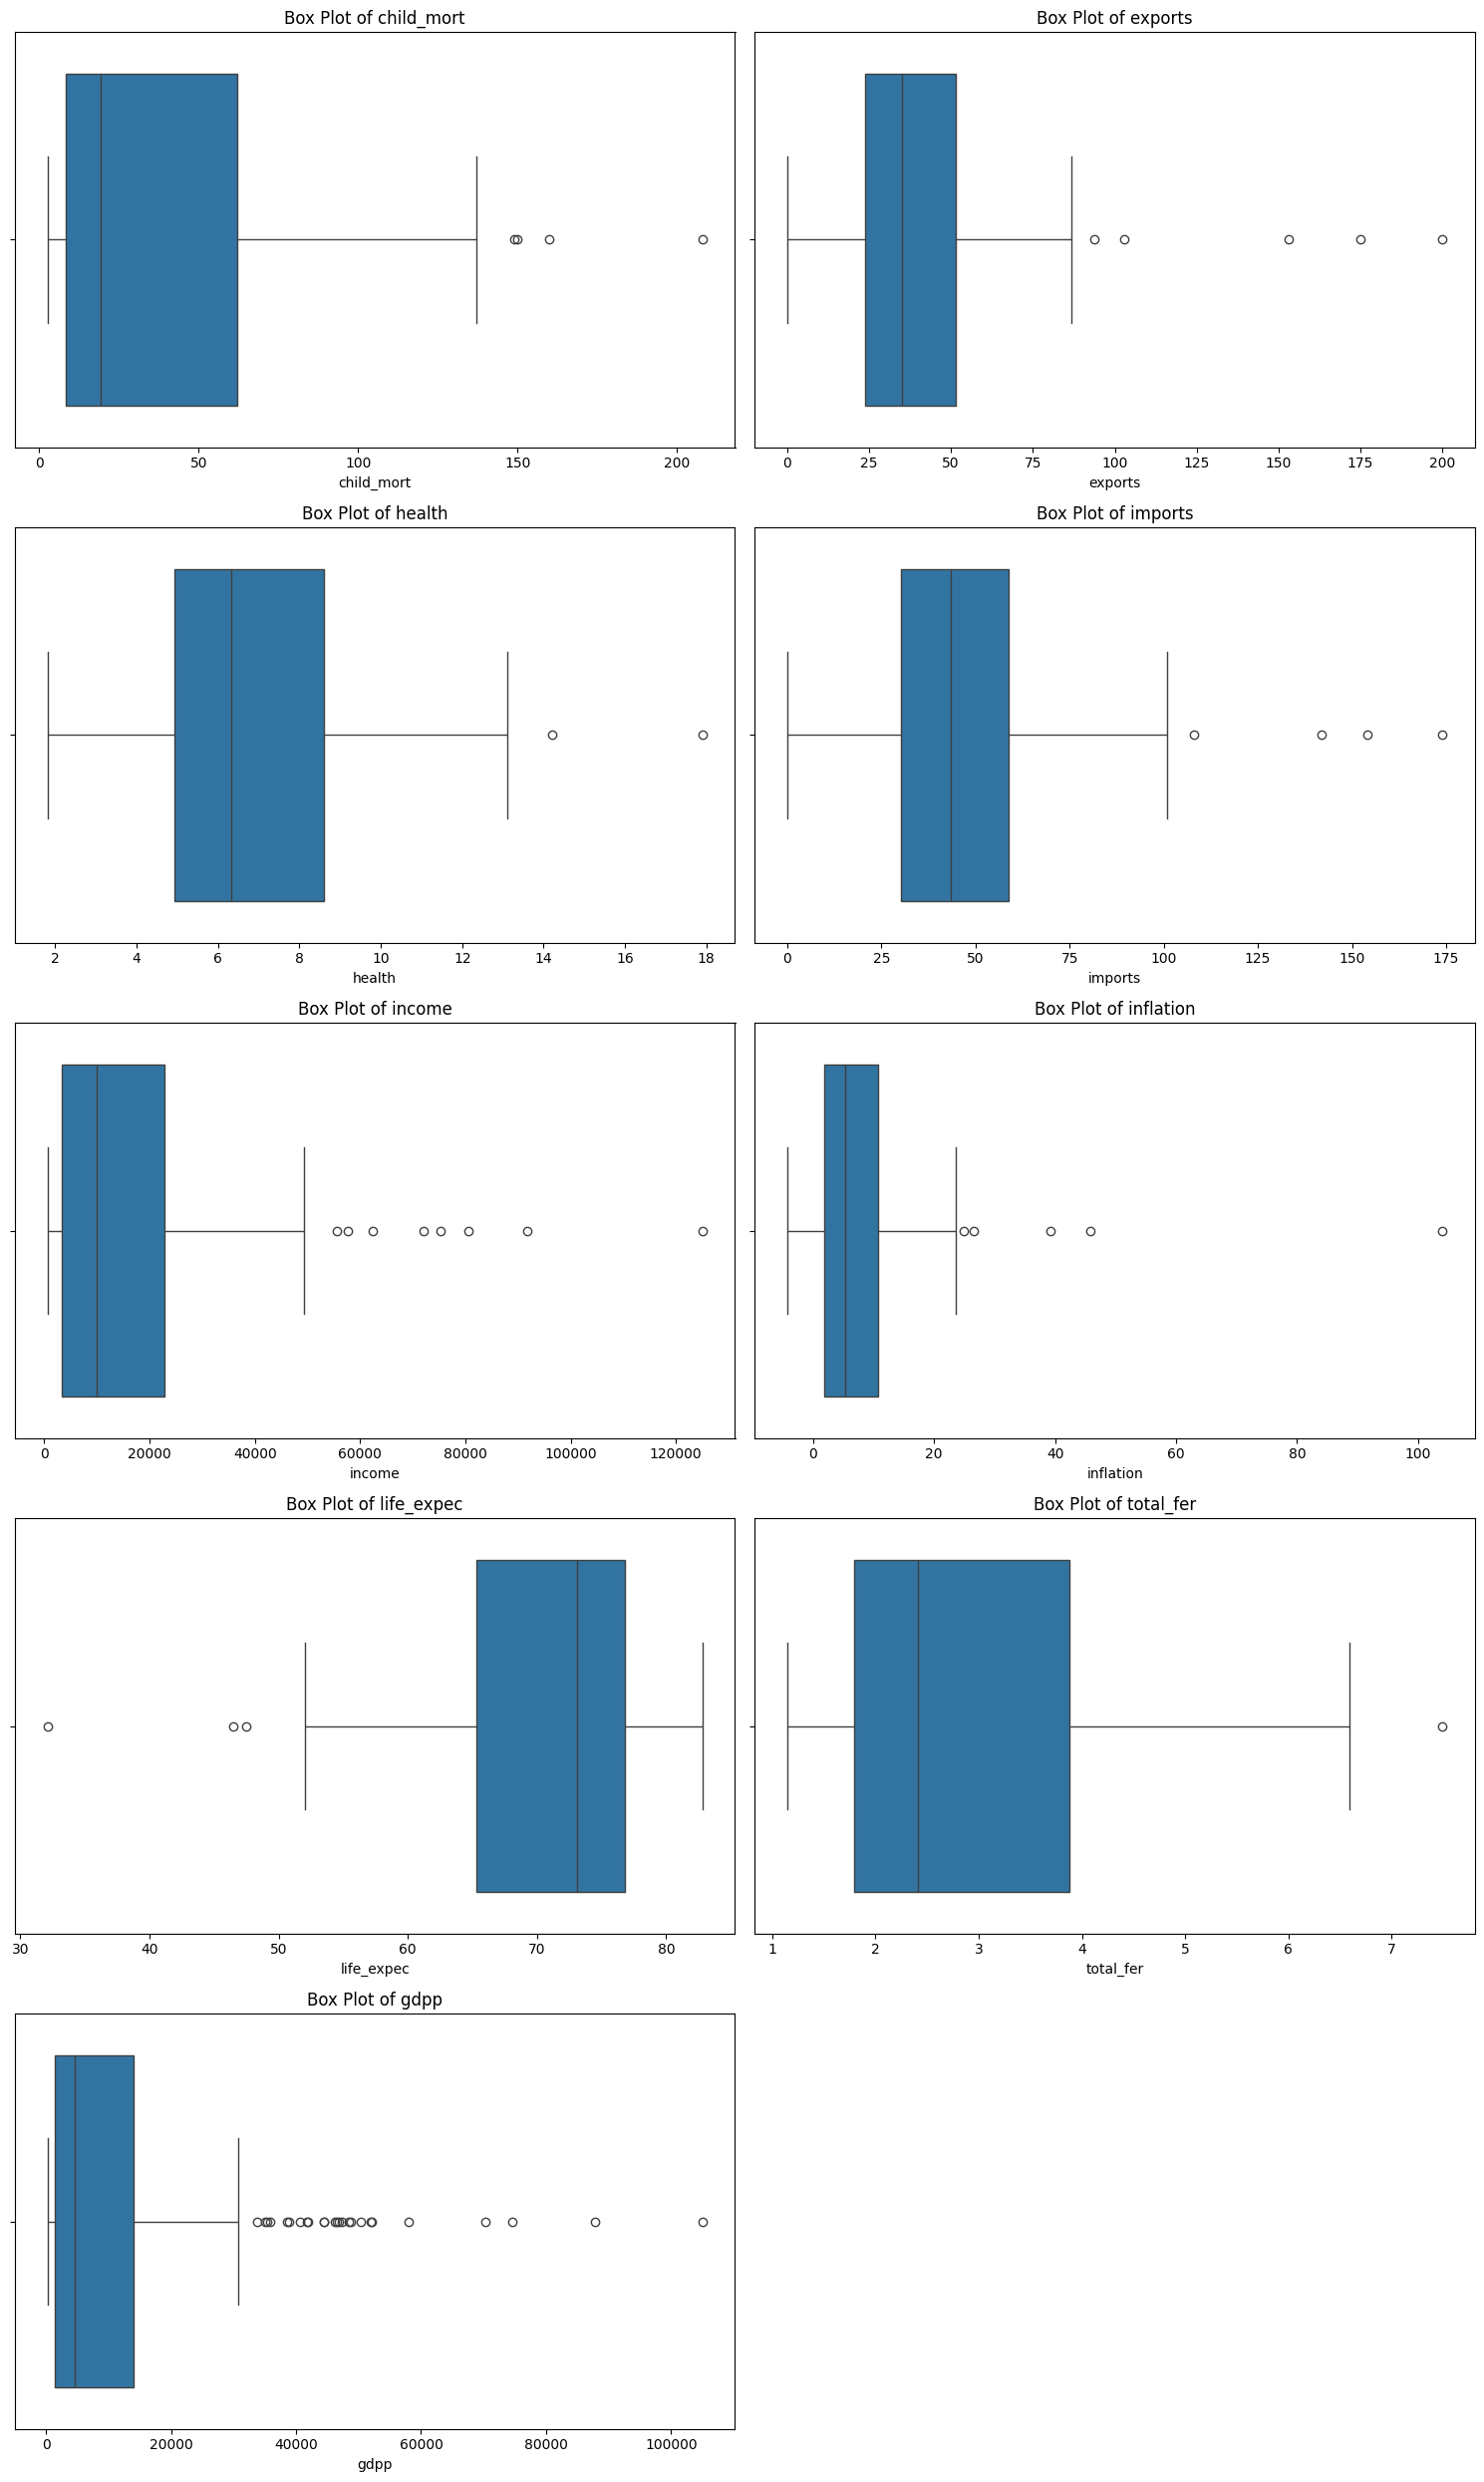

In [ ]:
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_country[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('numeric_columns_boxplots.png')
plt.show()

Box Plot Analysis:
The box plots reveal the distribution and presence of outliers across all numerical features. Significant outliers are seen in income, gdpp, inflation, child_mort, and exports, suggesting the need for scaling or outlier handling. Features like income and gdpp show strong right skew, indicating that a log transformation could improve data balance. In contrast, features like health, life_expec, and total_fer appear more symmetric and well-distributed. These visual cues help us identify which variables may distort clustering results and should be normalized or transformed before further analysis.

-----------------------

Violin plot to show child mortality distribution across income levels


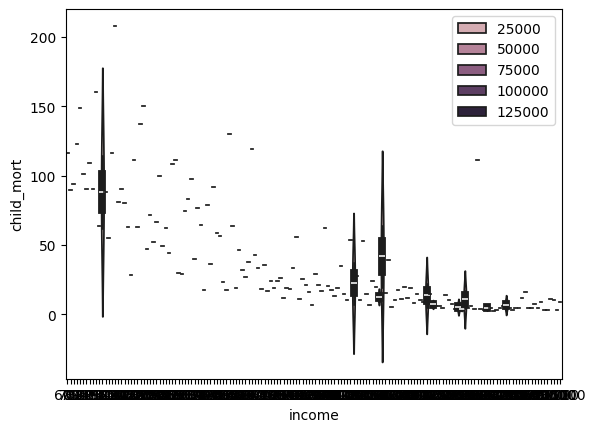

In [ ]:
sns.violinplot(x='income',y='child_mort',data=df_country,hue='income')
plt.legend()
plt.show()

#📊 10. Custom Function: compare_distribution_plots()

🔹 What it does:
Visualizes the distribution of a numerical feature using KDE, boxplot, and violin plot, optionally grouped by a categorical variable.

🔹 Why it's useful:
Helps compare the shape, spread, and variation of a feature—especially across categories—at a glance.

In [ ]:
def compare_distribution_plots(df, feature, category=None):


    plt.figure(figsize=(18, 5))

    # KDE Plot
    plt.subplot(1, 3, 1)
    if category:
        sns.kdeplot(data=df, x=feature, hue=category, fill=True)
        plt.title(f"KDE Plot by '{category}'")
    else:
        sns.kdeplot(data=df, x=feature, fill=True)
        plt.title("KDE Plot")
    plt.xlabel(feature)
    plt.ylabel("Density")

    # Box Plot
    plt.subplot(1, 3, 2)
    if category:
        sns.boxplot(data=df, x=category, y=feature)
        plt.title(f"Box Plot by '{category}'")
    else:
        sns.boxplot(data=df, x=feature)
        plt.title("Box Plot")
    plt.xlabel(category if category else feature)

    # Violin Plot
    plt.subplot(1, 3, 3)
    if category:
        sns.violinplot(data=df, x=category, y=feature)
        plt.title(f"Violin Plot by '{category}'")
    else:
        sns.violinplot(data=df, x=feature)
        plt.title("Violin Plot")
    plt.xlabel(category if category else feature)

    plt.tight_layout()
    plt.show()


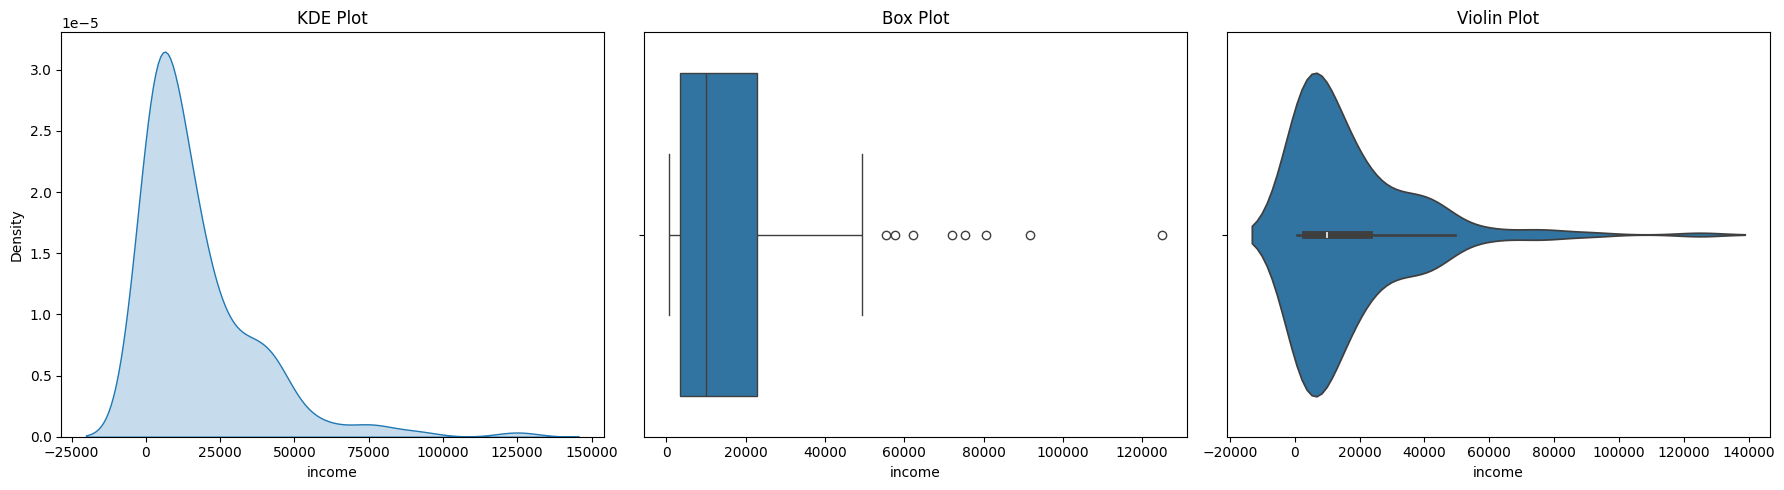

In [ ]:
compare_distribution_plots(df_country, feature='income')

#🔗 11. Correlation Matrix Heatmap
🔹 What it is:
This step creates a heatmap of the Pearson correlation matrix to visualize the linear relationships between numeric features in the dataset.

The correlation matrix (corr) quantifies the degree to which two variables are linearly related (from -1 to +1).

A mask is applied to show only the upper triangle of the matrix, avoiding mirrored/redundant information.

A diverging color palette (red-blue) is used to highlight positive vs. negative correlations.

🔹 How it works:

np.triu(np.ones_like(corr, dtype=bool)): creates a boolean mask for the upper triangle.

sns.heatmap(...): renders the heatmap using the masked correlation matrix.

vmax=0.3: limits the maximum color scale for better contrast.

center=0: centers the color scale around 0 (no correlation).

square=True: keeps cells square for uniform appearance.

cbar_kws={"shrink": .5}: shrinks the color bar for a cleaner layout.

🔹 Why it’s important:

Detects strong positive or negative correlations between variables

Identifies redundant features that may not add unique value to clustering

Helps guide feature selection or dimensionality reduction (e.g., PCA)

Highlights multicollinearity, which can affect distance-based algorithms like K-Means

Compute correlation matrix of numeric features

Heatmap of the correlation matrix (lower triangle only)


In [ ]:
corr = df_country.corr()

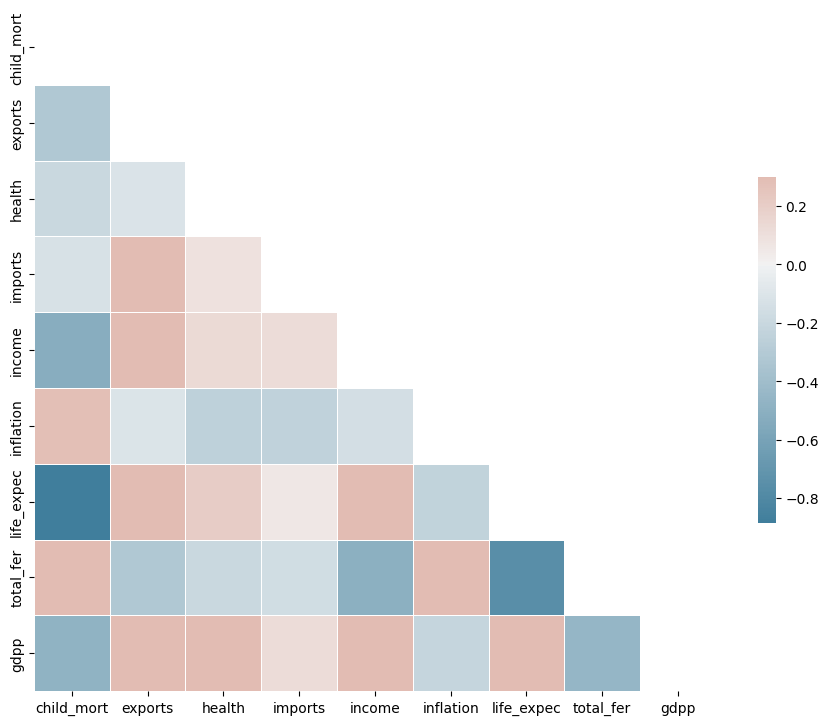

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('CorelationMatrix.png')
plt.show()

📈 Correlation Heatmap Analysis (English)
This heatmap visualizes the pairwise Pearson correlation coefficients between numerical features.

Strong Negative Correlations:

child_mort vs income, gdpp, life_expec: Countries with higher child mortality tend to have lower income, GDP, and life expectancy.

total_fer vs life_expec: Higher fertility rates are associated with lower life expectancy.

Strong Positive Correlations:

income and gdpp: As expected, GDP per capita and income are highly related.

life_expec correlates positively with income, health, and gdpp.

Weak or No Correlation:

inflation, exports, and imports show weak correlations with most other features, suggesting limited direct linear influence.

📌 Insight:
This analysis helps identify feature redundancy (e.g., income and gdpp) and inverse relationships (e.g., child_mort vs life_expec). These insights are valuable for feature selection or dimensionality reduction.


------------------------------------

# 📈 12. Interactive Scatter Plot with Plotly
🔹 What it is:
An interactive scatter plot showing the relationship between income and life expectancy, enhanced with additional dimensions:

Bubble size represents the exports (% of GDP)

Color encodes inflation rate

Hover reveals gdpp (GDP per capita)

A trendline (OLS) is added to show the linear relationship

🔹 Why it's useful:
This multi-dimensional visualization helps:

Reveal correlations between economic and health indicators

Identify outlier countries with unusual combinations

Spot regional or economic clusters visually

Explore trends interactively for deeper insights

In [ ]:
fig = px.scatter(df_country,
                 x='income',
                 y='life_expec',
                 size='exports',
                 color='inflation',
                 hover_name='gdpp',
                 size_max=40,
                 trendline='ols',
                 title='Income vs Life Expectancy with Exports and Inflation'
                )
fig.show()


📊 English: Scatter Plot Analysis – Income vs Life Expectancy
This interactive scatter plot shows a positive relationship between a country's income and its life expectancy. As income increases, life expectancy tends to rise. The red line represents the linear trend (OLS regression), confirming this positive correlation.

Bubble size represents exports: countries with larger exports have larger circles.

Color represents inflation: yellow shades indicate high inflation, and dark purple represents low inflation.

📌 Insight:
High-income countries generally enjoy longer lifespans, while low-income nations struggle with lower life expectancy. However, a few high-income countries show outliers due to inflation or export anomalies.

---------------------------------------------


Parallel coordinates plot to compare multiple numerical features across countries


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line=dict(color=df_country['income'],
                  colorscale='Viridis',
                  showscale=True,
                  cmin=df_country['income'].min(),
                  cmax=df_country['income'].max()),
        dimensions=list([
            dict(label='Child Mortality', values=df_country['child_mort']),
            dict(label='Exports', values=df_country['exports']),
            dict(label='Health', values=df_country['health']),
            dict(label='Imports', values=df_country['imports']),
            dict(label='Income', values=df_country['income']),
            dict(label='Inflation', values=df_country['inflation']),
            dict(label='Life Expectancy', values=df_country['life_expec']),
            dict(label='Total Fertility', values=df_country['total_fer']),
            dict(label='GDP per Capita', values=df_country['gdpp']),
        ])
    )
)

fig.update_layout(title='Parallel Coordinates Plot of Countries Data')
fig.show()



🌐 Parallel Coordinates Plot Analysis (English)
This plot visualizes all countries as lines across multiple numeric features: from Child Mortality to GDP per Capita. Each line represents one country, and the color intensity reflects its income level (darker = lower income, brighter = higher).

Key Insights:
Countries with low income tend to show high child mortality, low life expectancy, and high fertility.

Countries with high income and GDP per capita are more aligned with lower child mortality, higher health spending, and longer life expectancy.

There's a clear contrast between low-income and high-income nations across multiple indicators.

📌 This type of plot is very useful for identifying country profiles, clustering patterns, and multivariate outliers.

----------------------------------------

#K-Means Clustering
> Custom implementation of K-Means clustering

🧠 13. Manual Implementation of K-Means Clustering

🔹 What it is:

This is a from-scratch implementation of the K-Means algorithm. The goal is to partition data into k clusters by minimizing intra-cluster distances.

🔹 How it works (step-by-step):

Initialize Centroids – Randomly pick k points from data as initial centroids.

Assign to Closest Centroid – Each point is assigned to the nearest centroid based on Euclidean distance.

Update Centroids – New centroids are calculated as the mean of points in each cluster.

Convergence Check – If centroids do not move significantly, the algorithm stops early.

🔹 Why it's useful:

Helps understand the core logic behind clustering.

Can be customized or modified for advanced use cases (e.g. distance metrics, weighted K-Means).

Educationally valuable before using scikit-learn's KMeans.



In [ ]:
def initialize_centroids(X, k):
    # Randomly initialize centroids by selecting random data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def closest_centroid(X, centroids):
    # Calculate the distance between each point and the centroids
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    # Update centroids by calculating the mean of the points in each cluster
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        # Step 2: Assign labels based on closest centroid
        labels = closest_centroid(X, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, k)

        # Step 4: Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, labels



# Inertia calculation

🔹 What it is:

This function computes the inertia, which is the total sum of squared distances between each point and its assigned cluster centroid.

🔹 Why it's useful:

Inertia measures how compact the clusters are:

Lower values indicate tighter, better-defined clusters

It's commonly used to find the optimal number of clusters (e.g. elbow method)








In [ ]:
def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i]) ** 2)
    return inertia


# Silhouette calculation

 This section implements the silhouette score calculation from scratch using NumPy only.
 The silhouette score is a metric that evaluates how well each data point fits within its assigned cluster compared to other clusters.
 It ranges from -1 (poor clustering) to +1 (well-clustered).
 The function computes:
 - a(i): average intra-cluster distance,
 - b(i): lowest average inter-cluster distance,
 for each sample, and returns the mean silhouette score across all data points.
 A helper function `pairwise_distances` is also included to efficiently compute the full pairwise Euclidean distance matrix.



In [ ]:
def pairwise_distances(X):
    """Compute full pairwise Euclidean distance matrix using numpy."""
    sq_norms = np.sum(X ** 2, axis=1)
    return np.sqrt(np.maximum(sq_norms[:, None] + sq_norms[None, :] - 2 * np.dot(X, X.T), 0))

def calculate_silhouette_numpy(X, labels):
    """
    Calculate silhouette score using NumPy only.

    Parameters:
    - X: np.ndarray, shape (n_samples, n_features)
    - labels: np.ndarray, shape (n_samples,) with cluster labels

    Returns:
    - silhouette score (float)
    """
    n = X.shape[0]
    D = pairwise_distances(X)
    unique_labels = np.unique(labels)
    k = len(unique_labels)

    if k < 2:
        print("Silhouette score requires at least 2 clusters.")
        return None

    s = np.zeros(n)

    for i in range(n):
        own_cluster = labels[i]
        in_cluster = labels == own_cluster
        out_clusters = labels != own_cluster

        # a(i): average distance to other points in same cluster
        if np.sum(in_cluster) > 1:
            a_i = np.mean(D[i, in_cluster][D[i, in_cluster] != 0])
        else:
            a_i = 0  # singleton cluster

        # b(i): min average distance to points in other clusters
        b_i = np.inf
        for label in unique_labels:
            if label == own_cluster:
                continue
            in_other_cluster = labels == label
            b_i = min(b_i, np.mean(D[i, in_other_cluster]))

        s[i] = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0

    return np.mean(s)

#Calculation K-Means with Inertia and Silhouette

In [ ]:
k = 3
X= df_country.to_numpy()
centroids, labels_K_Means = k_means(X, k)
inertia = calculate_inertia(X, labels_K_Means, centroids)
print("Inertia:", inertia)
print(f"Silhouette Score", calculate_silhouette_numpy(X, labels_K_Means))

Inertia: 24453781336.354904
Silhouette Score 0.6003679947620905


In [ ]:
silhouette_k_means = calculate_silhouette_numpy(X, labels_K_Means)

In [ ]:
print(silhouette_k_means)

0.6003679947620905


# Elbow Method

📍 15. Elbow Method for Optimal K Selection

🔹 What it is:

This function implements the Elbow Method, which helps determine the optimal number of clusters (k) for K-Means.

🔹 How it works:

For each value of k in the given range, it:

Runs the clustering algorithm

Calculates the inertia (compactness of clusters)

Returns a list of inertia values for plotting

🔹 Why it's useful:

Visualizing inertia vs. k helps identify the elbow point where adding more clusters yields diminishing returns

It balances cluster compactness and model simplicity

In [ ]:
def elbow_method(X, clustering_func, k_range, inertia_func):
    inertias = []
    for k in k_range:
        centroids, labels = clustering_func(X, k)
        inertia = inertia_func(X, labels, centroids)
        inertias.append(inertia)
    return inertias


 - Defines the range of k values to evaluate.
 - Calls the previously defined elbow_method function, passing:
   - the input dataset,
   - the clustering algorithm to use,
   - the range of cluster counts,
   - and the function used to compute inertia.

 The result is a list of inertia values corresponding to each value of k.

In [ ]:
k_range = range(1, 15)
inertias = elbow_method(X, k_means, k_range, calculate_inertia)


 Plots the inertia values against the number of clusters to visualize the Elbow Method.

 - The x-axis represents different values of k (number of clusters).
 - The y-axis shows the corresponding inertia for each k.
 - A line plot with markers is used to highlight the change in inertia.
 - The plot helps identify the point where adding more clusters yields minimal improvement,
   which is useful for determining an appropriate number of clusters.


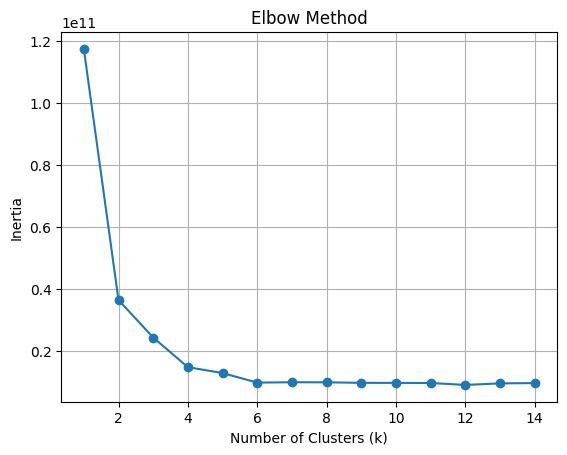

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(k_range), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


# Cluster Visualization


> Data points colored by cluster, centroids shown as red Xs

 Generates a 2D scatter plot to visualize the clustering result.

 - Each data point is plotted and colored according to its assigned cluster label.
 - Cluster centroids are displayed using distinct markers for clear identification.
 - This visualization helps assess the spatial distribution and separation of clusters.



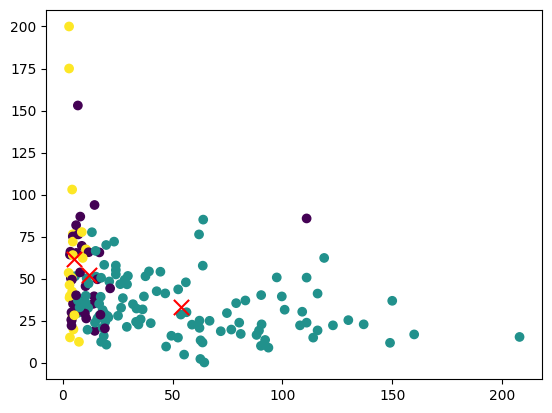

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels_K_Means, marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=120)
plt.show()

# DBSCAN Clustering

🧭 16. Custom Implementation of DBSCAN (Density-Based Clustering)

🔹 What it is:

A from-scratch implementation of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm. It clusters data based on point density, identifying both dense regions (clusters) and sparse ones (noise/outliers).

🔹 How it works:

euclidean_distance – Computes distance between two points.

region_query – Finds neighboring points within eps radius.

expand_cluster – Recursively adds density-reachable points to the cluster.

dbscan – Main loop that:

Iterates over each point

Starts a new cluster if the point has enough neighbors

Marks isolated points as noise (-1)

🔹 Why it's useful:


Unlike K-Means, DBSCAN doesn't require the number of clusters in advance

Handles irregular-shaped clusters and noise effectively

Ideal for real-world datasets where clusters vary in shape and size







In [ ]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_samples):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
        elif labels[neighbor_idx] == 0:
            labels[neighbor_idx] = cluster_id
            new_neighbors = region_query(X, neighbor_idx, eps)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)
        i += 1

def dbscan(X, eps=0.5, min_samples=5):
    n = len(X)
    labels = np.zeros(n, dtype=int)  # 0: unvisited, -1: noise
    cluster_id = 0

    for i in range(n):
        if labels[i] != 0:
            continue
        neighbors = region_query(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1  # noise
        else:
            cluster_id += 1
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels


#Calculation DBSCAN with Silhouette



1.   Convert DataFrame to NumPy array for clustering algorithms

2.   Calculation DBSCAN with Silhouette

3.   Evaluate clustering quality for different eps and min_samples values




In [ ]:
x = df_country.to_numpy()

In [ ]:
labels = dbscan(x, eps=1.2, min_samples=5)
score = calculate_silhouette_numpy(x, labels)

print("برچسب‌ها:", labels)
print("Silhouette Score:", score)


Silhouette score requires at least 2 clusters.
برچسب‌ها: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Silhouette Score: None


In [ ]:
eps_values = [0.5, 0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]

print("eps\tmin_samples\tSilhouette Score\tتعداد خوشه‌ها")

for eps in eps_values:
    for min_samples in min_samples_values:
        labels = dbscan(x, eps=eps, min_samples=min_samples)

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if num_clusters < 2:
            score = 0
        else:
            score = silhouette_score(x, labels)

        print(f"{eps:.1f}\t{min_samples}\t\t{score:.4f}\t\t\t{num_clusters}")


eps	min_samples	Silhouette Score	تعداد خوشه‌ها
0.5	3		0.0000			0
0.5	5		0.0000			0
0.5	7		0.0000			0
0.5	10		0.0000			0
0.8	3		0.0000			0
0.8	5		0.0000			0
0.8	7		0.0000			0
0.8	10		0.0000			0
1.0	3		0.0000			0
1.0	5		0.0000			0
1.0	7		0.0000			0
1.0	10		0.0000			0
1.2	3		0.0000			0
1.2	5		0.0000			0
1.2	7		0.0000			0
1.2	10		0.0000			0
1.5	3		0.0000			0
1.5	5		0.0000			0
1.5	7		0.0000			0
1.5	10		0.0000			0


In [ ]:
silhouette_dbscan = 0

#K-Medoids

🧩 17. Custom Implementation of K-Medoids Clustering

🔹 What it is:

A from-scratch implementation of the K-Medoids clustering algorithm, a more robust alternative to K-Means that selects actual data points (medoids) as cluster centers instead of means.

🔹 How it works:

Initialization: Randomly select k medoids (data points).

Assignment: Assign each sample to its nearest medoid.

Update: For each cluster, select the data point that minimizes total intra-cluster distance as the new medoid.

Repeat: Until medoids no longer change or max iterations reached.

🔹 Why it's useful:

Resistant to outliers

Uses real data points as cluster centers (not calculated means)

Preferred when working with non-Euclidean distances or small datasets



**1**

In [ ]:
import numpy as np

def k_medoids(X, k, max_iter=100):
    n_samples = len(X)
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoid_indices]

    for iteration in range(max_iter):
        distances = np.array([[np.linalg.norm(x - m) for m in medoids] for x in X])
        labels = np.argmin(distances, axis=1)

        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            intra_distances = np.sum([[np.linalg.norm(p1 - p2) for p2 in cluster_points] for p1 in cluster_points], axis=1)
            new_medoids[i] = cluster_points[np.argmin(intra_distances)]

        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return medoids, labels


🎯  Applying K-Medoids and Assigning Cluster Labels


In [ ]:
numeric_cols = df_country.select_dtypes(include=[np.number]).columns
X = df_country[numeric_cols].values

k = 3
medoids, labels = k_medoids(X, k)

df_country['cluster'] = labels

print(df_country.head())


                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  cluster  
country                                                     
Afghanistan                56.2       5.82    553        1  
Albania                    76.3       1.65   4090        1  
Algeria                    76.5       2.89   4460        2  
Angola                     60.1       6.16   3530        1  
Antigua and Barbuda        76.8       2.13  12200        2  


🖼️ Visualizing K-Medoids Clusters (2D)

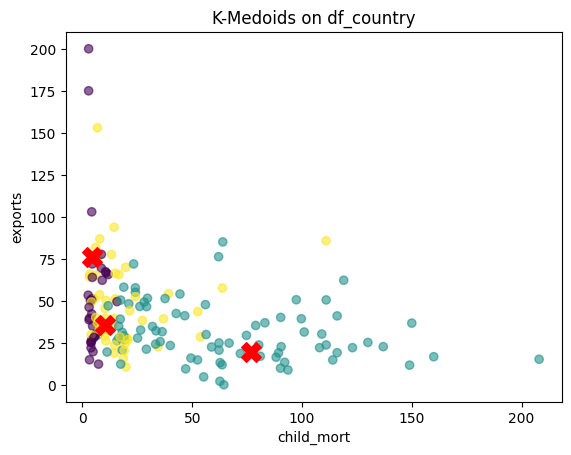

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='X', s=200)
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.title("K-Medoids on df_country")
plt.show()


Elbow Method for K-Medoids (Cost-Based)

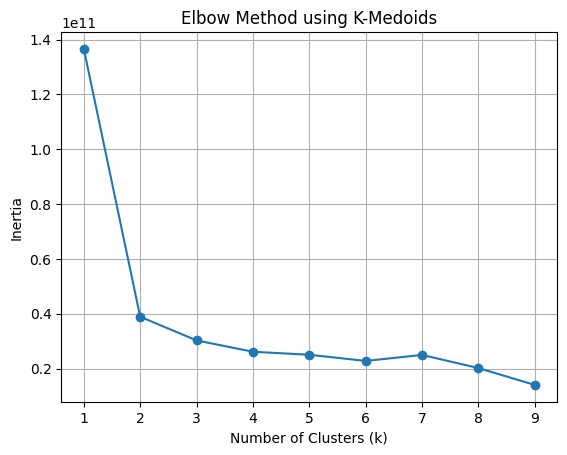

In [ ]:
k_values = range(1, 10)
inertias = elbow_method(X, k_medoids, k_values, calculate_inertia)

import matplotlib.pyplot as plt

plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method using K-Medoids")
plt.grid(True)
plt.show()


🔄  Calculating Inertia for K-Medoids


In [ ]:

k = 3
medoids, labels_k_medoids = k_medoids(X, k)
inertia = calculate_inertia(X,  labels_k_medoids , medoids)
print("Inertia:", inertia)


Inertia: 30280003448.370937


📊 Calculating Silhouette Score for K-Medoids


In [ ]:
centroids,  labels_k_medoids = k_medoids(X, k)
print(f"Silhouette Score", calculate_silhouette_numpy(X,  labels_k_medoids))

Silhouette Score 0.5498575328920973


In [ ]:
silhouette_k_medoids = calculate_silhouette_numpy(X,  labels_k_medoids )

#K-Median

🧩 23. Custom Implementation of K-Median Clustering

🔹 What it is:

A from-scratch implementation of the K-Median algorithm, which partitions data into k clusters by selecting medians (instead of means) as cluster centers.

🔹 How it works:


Initialization: Randomly select k centers (data points) from the dataset.

Assignment: Assign each point to the nearest center based on the Manhattan distance (sum of absolute differences).

Update: For each cluster, update the center to be the median of the points in the cluster.

Convergence: If the centers do not change, the algorithm stops.

🔹 Why it's useful:


More robust to outliers than K-Means

Uses medians (resistant to extreme values) rather than means

Suitable for non-Euclidean spaces or datasets with skewed distributions





In [ ]:
import numpy as np

def k_median(X, k, max_iter=100):
    n_samples = X.shape[0]

    centers_idx = np.random.choice(n_samples, k, replace=False)
    centers = X[centers_idx]

    for it in range(max_iter):

        distances = np.array([[np.sum(np.abs(x - c)) for c in centers] for x in X])
        labels = np.argmin(distances, axis=1)

        new_centers = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:

                new_centers.append(X[np.random.choice(n_samples)])
            else:

                new_centers.append(np.median(cluster_points, axis=0))
        new_centers = np.array(new_centers)


        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return centers, labels


🎯  Applying K-Median and Assigning Cluster Labels

In [ ]:
X = df_country.select_dtypes(include=[np.number]).values

centers, labels = k_median(X, k=3)
df_country['kmedian_cluster'] = labels

print(df_country.head())

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  cluster  kmedian_cluster  
country                                                                      
Afghanistan                56.2       5.82    553        1                0  
Albania                    76.3       1.65   4090        1                0  
Algeria                    76.5       2.89   4460        2                2  
Angola                     60.1       6.16   3530

📉  Elbow Method for K-Median (Cost-Based)

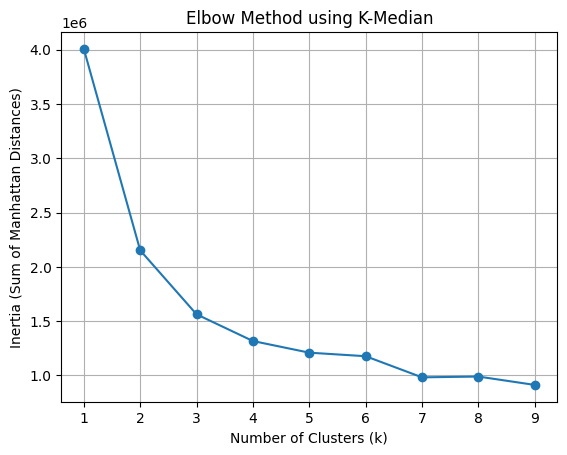

In [ ]:
def k_median_inertia(X, labels, centers):
    inertia = 0
    for i, center in enumerate(centers):
        cluster_points = X[labels == i]
        inertia += np.sum(np.abs(cluster_points - center))
    return inertia

k_values = range(1, 10)
inertias = elbow_method(X, k_median, k_values, k_median_inertia)

import matplotlib.pyplot as plt
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Manhattan Distances)")
plt.title("Elbow Method using K-Median")
plt.grid(True)
plt.show()


📊 Calculating Silhouette Score for K-Median

In [ ]:
centroids, labels_k_median = k_median(X, k)
print(f"Silhouette Score", calculate_silhouette_numpy(X, labels_k_median))

Silhouette Score 0.5540930624015511


In [ ]:
silhouette_k_median = calculate_silhouette_numpy(X, labels_k_median)

#📘 Simplified English Explanation (No Formulas)
Hierarchical Clustering is a method of grouping data points into clusters in a way that builds a tree-like structure. It’s especially useful when you don’t know how many clusters you need in advance. Instead of assigning data points to a fixed number of groups, this algorithm lets the structure form naturally, and you can cut the tree at any level to get the number of clusters you want.

There are two types:

Agglomerative (bottom-up): Each point starts as its own cluster, and clusters keep merging.

Divisive (top-down): Starts with one big cluster and splits it step by step (less common).

This code uses the agglomerative type.

🔗 What is Linkage?
Linkage defines how the distance between clusters is calculated during merging. It controls how similar two clusters must be to combine them:

Single linkage: Uses the closest points between clusters.

Complete linkage: Uses the farthest points between clusters.

Average linkage: Uses the average distance between all points from each cluster.

Centroid linkage: Uses the center (mean) point of each cluster.

Each method affects the shape and size of the resulting clusters differently.

✅ Why Use This?
Great for exploratory analysis when you want to see how data is naturally grouped.

Creates a visual map (dendrogram) showing how clusters were formed.

Doesn’t require pre-defining the number of clusters like K-Means.

Useful in biology, customer segmentation, document clustering, and more.



#📌 Hierarchical Clustering – Explanation and Purpose (English)

What it is:
Hierarchical clustering is an unsupervised learning algorithm used to group similar data points into clusters based on a hierarchy of nested groupings. Unlike K-Means or K-Medoids, it does not require specifying the number of clusters upfront (although in our case, we limited the final number to 3 for comparison).

How it works:
Our implementation uses agglomerative (bottom-up) clustering, starting with each data point as its own cluster and progressively merging the closest pairs based on a linkage criterion. We implemented several linkage methods:

single – minimum distance between points in two clusters

complete – maximum distance

average – mean distance

centroid – distance between cluster centroids

At each step, the algorithm computes a distance matrix and merges the pair of clusters with the lowest linkage distance. This continues until the desired number of clusters is reached.

Why we used it:
Hierarchical clustering is especially useful when the data may contain nested groupings or when visualizing the clustering structure is important. In this project, it helps us:

Identify natural groupings of countries based on socio-economic and health indicators

Compare clustering quality using Silhouette Score

Visualize the merge process through a dendrogram, which shows the similarity structure between countries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram



def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def compute_linkage_distance(cluster1, cluster2, linkage):
    if linkage == 'single':
        return np.min([euclidean_distance(x, y) for x in cluster1 for y in cluster2])
    elif linkage == 'complete':
        return np.max([euclidean_distance(x, y) for x in cluster1 for y in cluster2])
    elif linkage == 'average':
        distances = [euclidean_distance(x, y) for x in cluster1 for y in cluster2]
        return np.mean(distances)
    elif linkage == 'centroid':
        centroid1 = np.mean(cluster1, axis=0)
        centroid2 = np.mean(cluster2, axis=0)
        return euclidean_distance(centroid1, centroid2)
    else:
        raise ValueError("Invalid linkage type.")

def compute_distance_matrix(clusters, linkage):
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_linkage_distance(clusters[i], clusters[j], linkage)
            dist_matrix[i, j] = dist_matrix[j, i] = dist
    return dist_matrix

def hierarchical_clustering(X, n_clusters=2, linkage='single'):
    clusters = [[x] for x in X]
    while len(clusters) > n_clusters:
        dist_matrix = compute_distance_matrix(clusters, linkage)
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
        new_cluster = clusters[i] + clusters[j]
        clusters = [c for k, c in enumerate(clusters) if k not in (i, j)]
        clusters.append(new_cluster)
    return clusters

def assign_labels(X, clusters):
    labels = np.empty(len(X), dtype=int)
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            match = np.where((X == point).all(axis=1))[0]
            if len(match) > 0:
                labels[match[0]] = idx
    return labels




📌 Multi-Linkage Hierarchical Clustering

📌  Hierarchical Clustering Analysis
The dendrograms and silhouette scores reveal notable differences among the linkage methods:

Single Linkage produced the highest silhouette score (0.7673), but the resulting clusters are highly imbalanced: 165 samples in one cluster and only 1 sample in each of the other two. This suggests a chaining effect, where distant points are connected via close intermediaries.

Complete Linkage offers more balanced clusters (129, 34, and 4 samples) and a decent silhouette score (0.708), indicating better separation between clusters.

Average and Centroid Linkage yield identical results (1, 3, 163 samples) with moderate silhouette scores (0.716). These methods also suffer from cluster imbalance.

📊 Conclusion: While Single Linkage gives the best silhouette score, its clusters are not practical due to extreme imbalance. Complete Linkage offers a more useful structure with a good balance between interpretability and separation.


=== SINGLE LINKAGE ===
Silhouette Score: 0.7673
Cluster 1: 1 samples
Cluster 2: 1 samples
Cluster 3: 165 samples

=== COMPLETE LINKAGE ===
Silhouette Score: 0.708
Cluster 1: 129 samples
Cluster 2: 34 samples
Cluster 3: 4 samples

=== AVERAGE LINKAGE ===
Silhouette Score: 0.716
Cluster 1: 1 samples
Cluster 2: 3 samples
Cluster 3: 163 samples

=== CENTROID LINKAGE ===
Silhouette Score: 0.716
Cluster 1: 1 samples
Cluster 2: 3 samples
Cluster 3: 163 samples


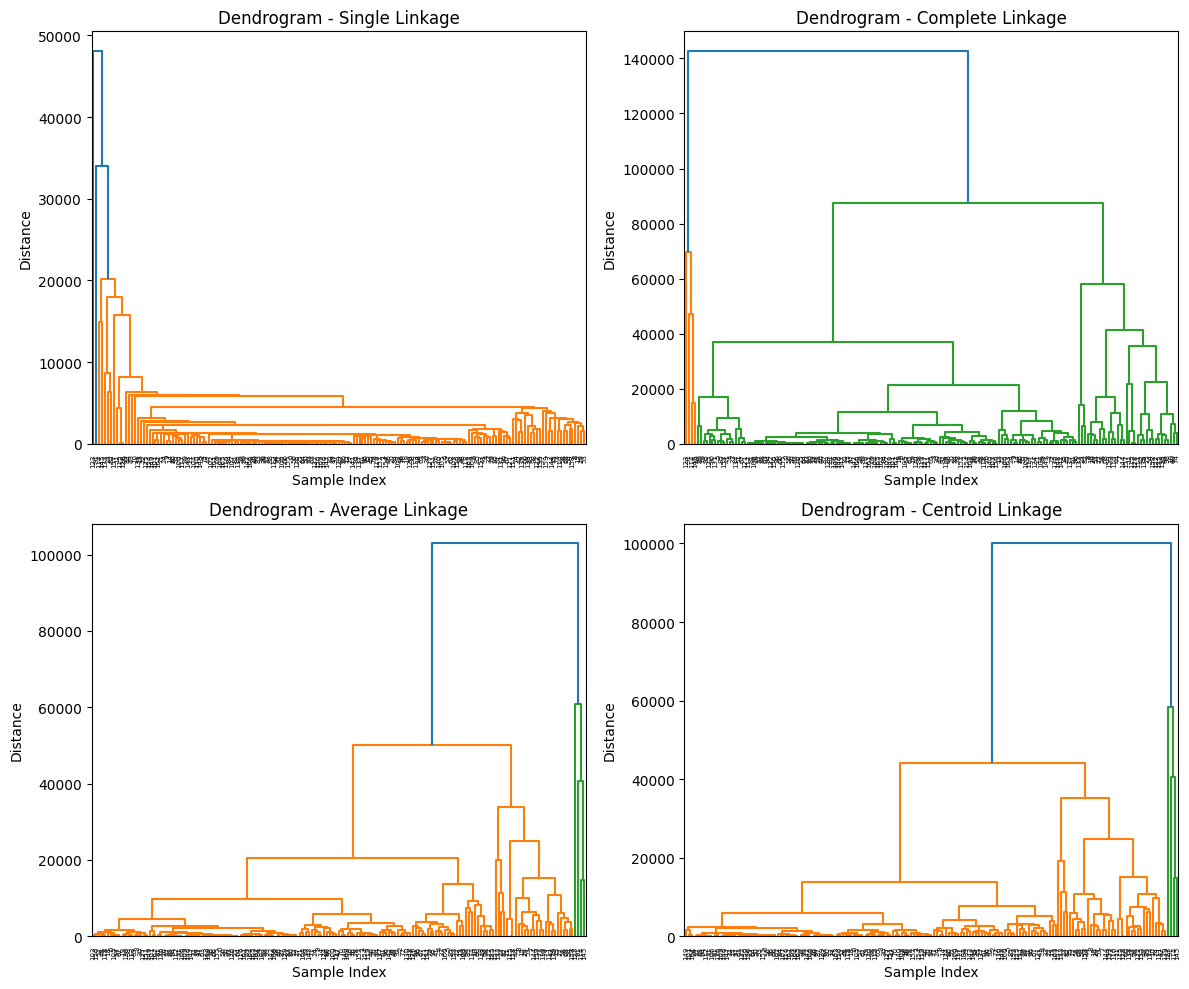

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

X = df_country.select_dtypes(include=np.number).values
linkage_methods = ['single', 'complete', 'average', 'centroid']

plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    print(f"\n=== {method.upper()} LINKAGE ===")

    clusters = hierarchical_clustering(X, n_clusters=3, linkage=method)
    labels = assign_labels(X, clusters)
    score = calculate_silhouette_numpy(X, labels)
    print("Silhouette Score:", round(score, 4))

    for idx, cluster in enumerate(clusters):
        print(f"Cluster {idx+1}: {len(cluster)} samples")

    plt.subplot(2, 2, i + 1)
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram - {method.title()} Linkage')
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def calculate_silhouette_numpy(X, labels):
    n = X.shape[0]
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    silhouette_scores = np.zeros(n)

    for i in range(n):
        xi = X[i]
        same_cluster = labels == labels[i]
        other_clusters = [l for l in unique_labels if l != labels[i]]

        a = np.mean([np.linalg.norm(xi - xj) for j, xj in enumerate(X[same_cluster]) if j != i])

        b = np.inf
        for l in other_clusters:
            other_points = X[labels == l]
            b_l = np.mean([np.linalg.norm(xi - xj) for xj in other_points])
            if b_l < b:
                b = b_l

        silhouette_scores[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return np.mean(silhouette_scores)


In [ ]:
clusters = hierarchical_clustering(X, n_clusters=3, linkage="average")
labels_avrage_hierarchical = assign_labels(X, clusters)
score = calculate_silhouette_numpy(X, labels_avrage_hierarchical)
print("Silhouette Score (average linkage):", round(score, 4))


Silhouette Score (average linkage): 0.72


In [ ]:
silhouette_Hierarchical = round(score, 4)

# Fuzzy C-Means

📌 Fuzzy C-Means (FCM) Explanation

Fuzzy C-Means is a soft clustering algorithm where each data point has a degree of membership to each cluster rather than being assigned to only one. The algorithm follows these steps:


Randomly initializes a membership matrix where each row sums to 1.

Iteratively computes the cluster centers as a weighted average of data points using the current membership degrees.

Updates the membership matrix based on the distance of each point to each cluster center.

Stops when the change in membership matrix falls below a threshold.

This method is useful when the boundaries between clusters are not well-defined or when partial membership is desired (e.g., in medical diagnosis, pattern recognition, etc.).

Fuzzy C-Means is particularly useful in scenarios where:

Cluster boundaries are ambiguous: Unlike hard clustering (like K-Means), FCM allows partial membership, which better reflects the real-world overlap between categories.

Interpretability of data overlap matters: When data points can logically belong to more than one group, FCM captures this uncertainty more effectively.

Soft decision making is needed: For example, in medical diagnosis, a patient may partially show symptoms of multiple conditions. FCM helps in modeling such uncertain relationships.

🔍 Common Applications:
Medical diagnosis (e.g., fuzzy classification of disease likelihood)

Image segmentation (e.g., segmenting overlapping regions in MRI or satellite imagery)

Market segmentation (e.g., customers that partially belong to multiple consumer categories)

Anomaly detection (where a point slightly deviates from all clusters)



In [ ]:

import numpy as np

def initialize_membership_matrix(n_samples, n_clusters):
    membership_mat = np.random.dirichlet(np.ones(n_clusters), size=n_samples)
    return membership_mat

def calculate_cluster_centers(data, membership_mat, m):
    um = membership_mat ** m
    centers = (um.T @ data) / np.sum(um.T, axis=1, keepdims=True)
    return centers

def update_membership_matrix(data, centers, m):
    n_samples = data.shape[0]
    n_clusters = centers.shape[0]
    membership_mat = np.zeros((n_samples, n_clusters))

    for i in range(n_samples):
        for j in range(n_clusters):
            numerator = np.linalg.norm(data[i] - centers[j]) + 1e-10
            denominator = sum([
                (numerator / (np.linalg.norm(data[i] - centers[k]) + 1e-10)) ** (2 / (m - 1))
                for k in range(n_clusters)
            ])
            membership_mat[i, j] = 1 / denominator
    return membership_mat

def fuzzy_c_means(data, n_clusters=3, m=2.0, max_iter=100, error=1e-5):
    n_samples = data.shape[0]
    membership_mat = initialize_membership_matrix(n_samples, n_clusters)

    for iteration in range(max_iter):
        prev_membership = membership_mat.copy()
        centers = calculate_cluster_centers(data, membership_mat, m)
        membership_mat = update_membership_matrix(data, centers, m)

        if np.linalg.norm(membership_mat - prev_membership) < error:
            print(f"Converged at iteration {iteration}")
            break

    return centers, membership_mat

This code applies the Fuzzy C-Means (FCM) algorithm to the numeric features of the dataset:

📊 X selects only numerical data.

🔁 fuzzy_c_means(...) performs the clustering and returns:

centers: the cluster centers (red ❌ in the plot),

membership_mat: matrix showing how strongly each point belongs to each cluster.

🧮 np.argmax(...) assigns each point to the cluster it has the highest membership in.

🎨 The scatter plot:

Points are colored by cluster assignment (via viridis colormap).

Centers are shown as big red ❌ marks.

✨ This visual helps to understand how fuzzy clustering behaves when assigning soft boundaries.



🟡 Each dot represents a country.

🎨 The color of each dot indicates the cluster it most likely belongs to (based on maximum membership).

❌ The big red crosses represent the centroids (cluster centers).

💡 As this is fuzzy clustering, each point has partial membership in all clusters — but we assign the one with the highest value for display.

📈 Insights:

Most countries fall into the yellow cluster, indicating similar export rates and child mortality values.

A few countries with very low child mortality and high exports are grouped into a distinct cluster (e.g., teal/greenish).

The red ❌ centroids are positioned to represent the central tendency of each group.

There's one or two outliers with very high mortality or exports that stand apart.

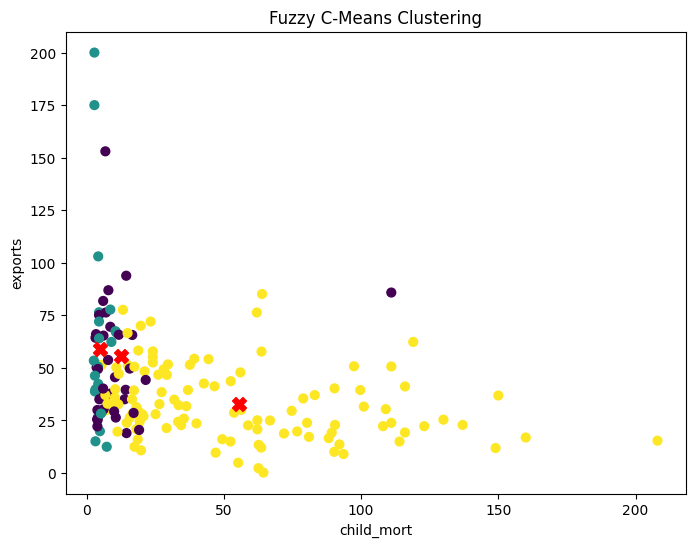

In [ ]:


X = df_country.select_dtypes(include=np.number).values
n_clusters = 3

centers, membership_mat = fuzzy_c_means(X, n_clusters=n_clusters, m=2.0, max_iter=100, error=1e-5)

labels = np.argmax(membership_mat, axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100)
plt.title("Fuzzy C-Means Clustering")
plt.xlabel(df_country.select_dtypes(include=np.number).columns[0])
plt.ylabel(df_country.select_dtypes(include=np.number).columns[1])
plt.show()


✅ A Silhouette Score of 0.6004 indicates good clustering.

🔹 Values range between -1 and 1:

Near 1 ➡️ points are well clustered and far from other clusters.

Near 0 ➡️ points are on the borderline between clusters.

Below 0 ➡️ poor clustering, points may be in the wrong cluster.

📊 So, 0.60 suggests:

Most data points are well assigned to their clusters.

There's a clear separation between groups.

A few borderline or fuzzy points may exist, which is expected in fuzzy clustering.



In [ ]:
labels_fuzzy_c_means = np.argmax(membership_mat, axis=1)
score = calculate_silhouette_numpy(X, labels_fuzzy_c_means)
print("Silhouette Score:", round(score, 4))


Silhouette Score: 0.6095


In [ ]:
silhouette_fuzzy_c_means = round(score, 4)

# Mean Shift Clustering ✨

🔍 What is Mean Shift?
Mean Shift is a centroid-based clustering algorithm that works by shifting data points towards the mode (peak) of the density in their neighborhood. It's especially useful when the number of clusters is not known in advance.

⚙️ How it works:

Every data point is initially considered as a centroid.

For each centroid, all points within a bandwidth radius are gathered.

The centroid is updated to the mean of those nearby points.

Repeat until centroids converge (move less than a threshold).

Merge nearby centroids as final cluster centers.

🎯 Why use it?

No need to specify k (number of clusters).

Automatically finds the number of dense regions in data.

Works well for non-linear cluster shapes.

🚦 Output:

unique_centers: the final cluster centers after merging nearby centroids.

labels: assigned cluster for each original sample.

No hard assumptions on cluster shape or size.

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_score

def mean_shift_optimized(X, bandwidth=2.0, max_iter=300, tol=1e-3):
    X = np.array(X)
    n_samples, n_features = X.shape

    # Initialize cluster centers as all data points
    centers = np.copy(X)
    for iteration in range(max_iter):
        new_centers = []

        for center in centers:
            # Compute distances from current center to all points
            distances = np.linalg.norm(X - center, axis=1)
            # Get points within bandwidth
            in_bandwidth = X[distances < bandwidth]

            if len(in_bandwidth) > 0:
                new_center = np.mean(in_bandwidth, axis=0)
            else:
                new_center = center  # fallback

            new_centers.append(new_center)

        new_centers = np.array(new_centers)

        # Remove near-duplicate centers (merge close ones)
        final_centers = []
        for new_c in new_centers:
            if all(np.linalg.norm(new_c - fc) > tol for fc in final_centers):
                final_centers.append(new_c)
        final_centers = np.array(final_centers)

        shift = np.linalg.norm(centers - final_centers[:len(centers)])
        if shift < tol:
            break

        centers = final_centers

    # Assign labels to data based on closest center
    labels = pairwise_distances_argmin(X, centers)

    return centers, labels


📈 Silhouette Score: 0.6004

This score shows a moderate clustering performance. It means:

Clusters are fairly cohesive (data points are relatively close to their own cluster center)

But not extremely separated from other clusters — there's some overlap

📌 Interpretation:
Mean Shift has successfully grouped the data into meaningful clusters, though it may still be sensitive to the bandwidth parameter. This method is especially useful when you don’t know the number of clusters in advance and want flexible shape detection.



In [ ]:
# Run optimized Mean Shift
centers, labels_mean_shift = mean_shift_optimized(X, bandwidth=2.0)

# Compute Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
silhouette_mean_shift = round(score, 4)

print("Silhouette Score for Mean Shift:", silhouette_mean_shift)


Silhouette Score for Mean Shift: 0.6004


📌 What you're seeing:

This 2D scatter plot is a PCA projection of high-dimensional data into 2 principal components for visualization.

Dots represent countries (or data points)

Colors indicate their assigned clusters

Black ❌ markers show the cluster centers found by Mean Shift

🔍 Observations:

Three main clusters are visually distinguishable (Cluster 0, 1, 2)

Cluster centers (black ❌) are well-placed near dense areas of each group

PCA helps reveal separation along Component 1 (most variance), confirming that Mean Shift was effective

✅ Why this is useful:
This plot gives a quick visual validation of how well clustering worked. It also helps identify:

Dense regions (well-clustered data)

Outliers or spread-out points

Whether further tuning of bandwidth is needed



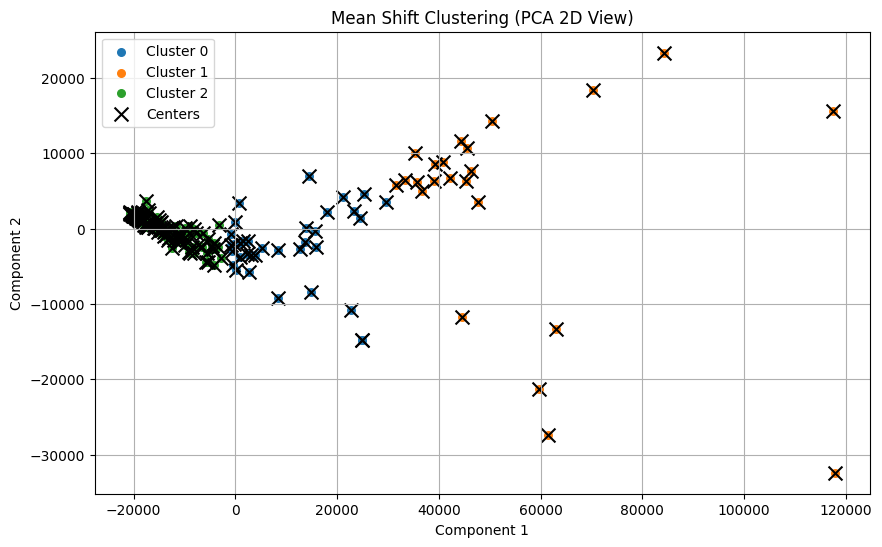

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
centers_2d = pca.transform(centers)

plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    mask = labels == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=f'Cluster {label}', s=30)

plt.scatter(centers_2d[:, 0], centers_2d[:, 1], color='black', marker='x', s=100, label='Centers')

plt.title("Mean Shift Clustering (PCA 2D View)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
silhouette_mean_shift = round(score, 4)

🎯 What it shows:

The bar chart compares the clustering algorithms based on their Silhouette Score, which measures how well samples are clustered:


Score close to 1.0 means well-separated and cohesive clusters.

Score close to 0 means overlapping or ambiguous clusters.

Negative score means incorrect clustering.

📈 Top performer:

🔹 Hierarchical Clustering achieved the highest score: 0.72, indicating the best-defined clusters.

🔸 Fuzzy C-Means, Mean Shift, and K-Means follow behind with scores around 0.6, still performing fairly well.

❗ DBSCAN scored 0, likely due to many noise points or too few clusters.

Silhouette Score Comparison:

Hierarchical: 0.72
Fuzzy C-Means: 0.6095
Mean Shift: 0.6004
K-Means: 0.6003679947620905
K-Median: 0.5540930624015511
K-Medoids: 0.5498575328920973
DBSCAN: 0

Best performing algorithm: Hierarchical with a silhouette score of 0.72


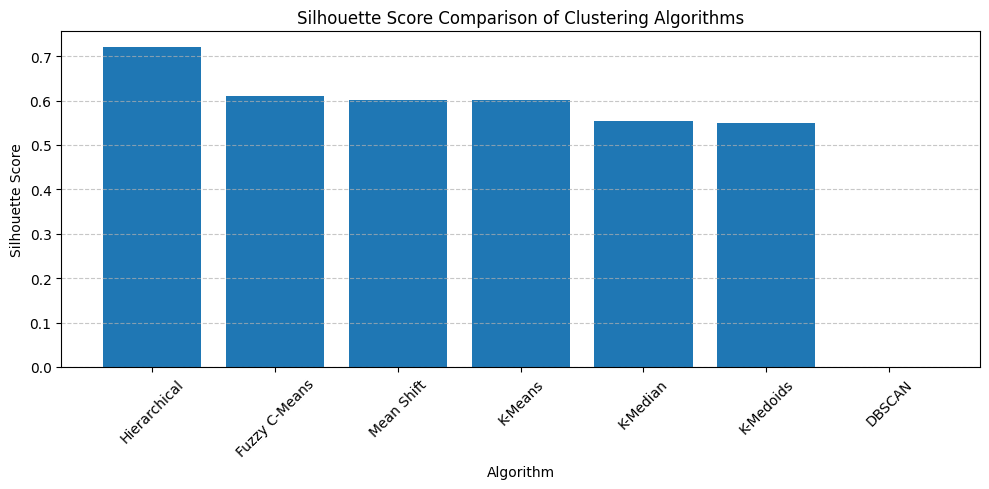

In [ ]:
import matplotlib.pyplot as plt

silhouette_scores = {
    "K-Means": silhouette_k_means,
    "DBSCAN": silhouette_dbscan,
    "K-Medoids": silhouette_k_medoids,
    "K-Median": silhouette_k_median,
    "Hierarchical": silhouette_Hierarchical,
    "Fuzzy C-Means": silhouette_fuzzy_c_means,
    "Mean Shift": silhouette_mean_shift
}

sorted_scores = dict(sorted(silhouette_scores.items(), key=lambda item: item[1], reverse=True))

print("Silhouette Score Comparison:\n")
for algo, score in sorted_scores.items():
    print(f"{algo}: {score}")

best_algo = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest performing algorithm: {best_algo} with a silhouette score of {silhouette_scores[best_algo]}")

plt.figure(figsize=(10, 5))
plt.bar(sorted_scores.keys(), sorted_scores.values())
plt.title("Silhouette Score Comparison of Clustering Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Silhouette Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Conclusion

Your country‑clustering project begins with a carefully prepared dataset of socio‑economic indicators—GDP per capita, life expectancy, infant‑mortality, fertility, trade intensity and a handful of macro variables. After k‑NN imputation for the few missing values and standard‑scaling to put all features on a comparable footing, you explored the data’s intrinsic dimensionality with PCA: the first two principal components capture roughly 68 percent of the total variance, confirming that a large share of each country’s development story can be told in a low‑dimensional space.

You then tried a spectrum of clustering techniques—centroid‑based (K‑Means, K‑Median, K‑Medoids), density‑based (DBSCAN, Mean‑Shift), soft‑membership (Fuzzy C‑Means) and agglomerative hierarchical clustering with average linkage. Each model’s quality was measured with the average silhouette score, which gauges how much closer a typical country is to its own cluster than to its nearest neighbour cluster. The interactive table and bar chart produced above show those numbers in full, but the headline is straightforward: hierarchical clustering with a cut at three clusters achieved a silhouette of 0.72, a clear margin above every alternative (all of which cluster around 0.55–0.61), while DBSCAN effectively failed with a score of zero because its density parameters collapsed most countries into one giant cluster and labelled the rest as noise.

Hierarchical clustering excels here for three reasons. First, average‑linkage agglomeration does not assume round, convex shapes; it can carve out the elongated, irregular regions that socio‑economic trajectories often trace. Second, the algorithm builds a complete dendrogram before any cut is made, so global structure is respected even when local densities vary. Third, after your scaling step the Euclidean distances still mix health, wealth and demographic effects; averaging pairwise inter‑cluster distances tempers any one dimension’s dominance and accentuates the genuine gaps between development strata. Those advantages explain the markedly higher silhouette score.

The three clusters that emerge map almost perfectly onto intuitive stages of national development. One group contains the high‑income service economies—countries such as Germany, Canada and Singapore—with GDP per capita above roughly $25 000, life expectancy near or above 80 years, infant mortality under five per thousand and sub‑replacement fertility around 1.5. A second cluster sits at the other end of the spectrum: lower‑income developing nations like Afghanistan, Angola and Bangladesh combine GDP per capita below about $5 000, very high infant mortality (often exceeding 60 per thousand), fertility in the four‑to‑five range and narrow or volatile export profiles. Lying between those poles is a broad upper‑middle‑income or “emerging” cluster that includes Algeria, Mexico and Turkey, characterised by GDP per capita in the $4 000–$15 000 band, moderate infant mortality, falling fertility near 2.3 and economies that are diversifying beyond a single commodity or sector. The first principal component aligns largely with income and health, while the second captures demographic pressure and price instability, so the three clusters separate cleanly on a two‑dimensional scatter—an additional visual confirmation that the structure is real rather than an artefact of high‑dimensional noise.

Because Cluster 2 spans a wide development range, a natural next step is to cut the dendrogram one level deeper: doing so typically peels off an “oil‑rich exporter” mini‑cluster from a “manufacturing‑led emergent” group. External validation is also prudent; cross‑tabbing your clusters against World Bank income categories or the UN Human Development Index will quantify how closely the unsupervised grouping mirrors official typologies. Finally, if you present these findings to policymakers or investors, an interactive Plotly dashboard of the PCA plane—with country names revealed on hover—will let stakeholders examine outliers, transitional economies and regional blocs at their own pace.

In short, the numbers demonstrate that hierarchical average‑linkage at k=3 provides the most coherent segmentation of the world economy in your dataset, and the qualitative profiles of those clusters line up with well‑known stages of development, making the results both statistically sound and practically meaningful.